/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


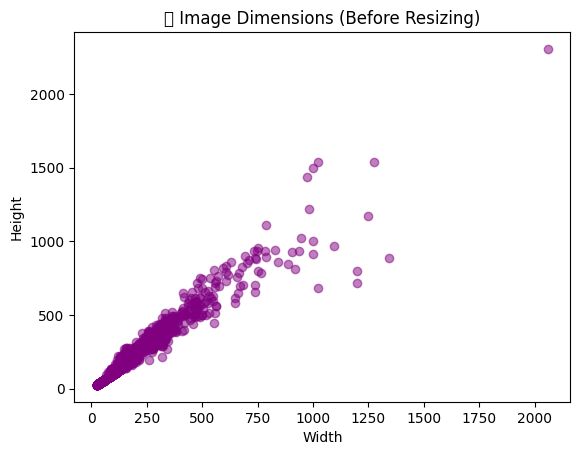

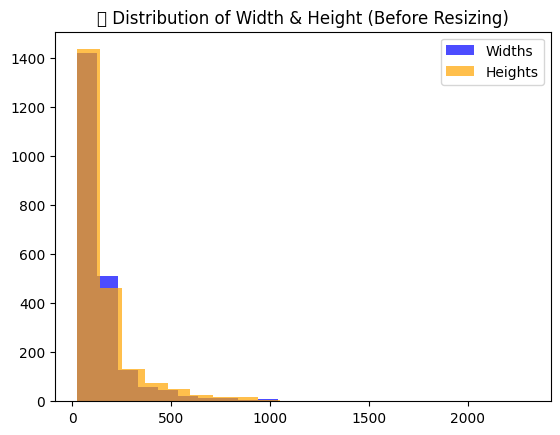

Resizing WithMask: 100%|██████████| 1068/1068 [00:08<00:00, 125.66it/s]


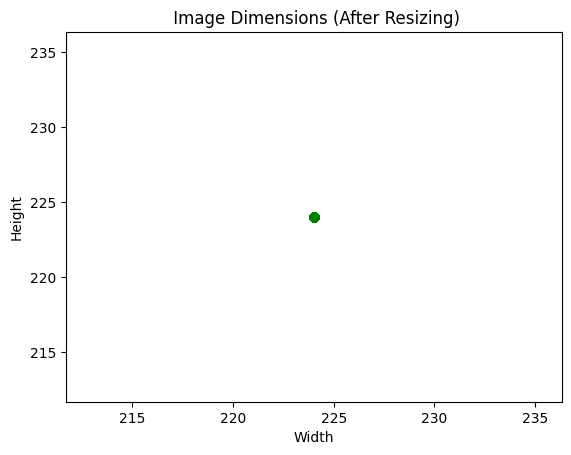

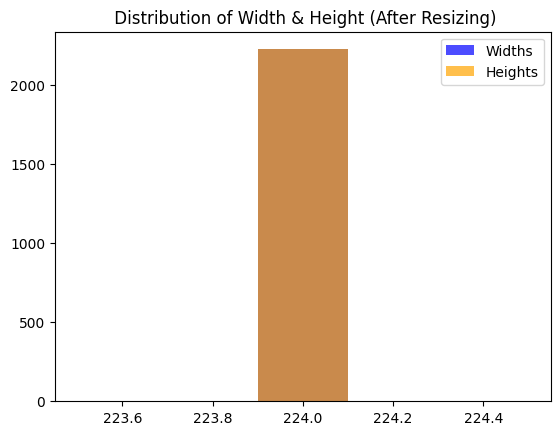

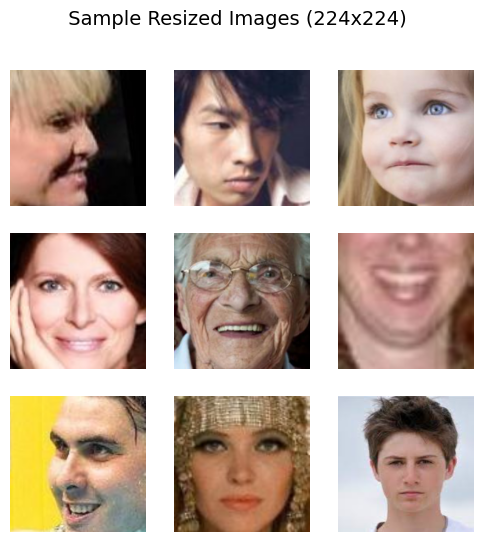

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import shutil
from tqdm import tqdm
import zipfile
import random

#Setup paths
cleaned_path = "/kaggle/input/cleaneddataset"
resized_path = "/kaggle/working/ResizedDataset"
os.makedirs(resized_path, exist_ok=True)

#Decide the target size
target_size = (224, 224)  

#Measure original image sizes
widths = []
heights = []

for category in os.listdir(cleaned_path):
    src_folder = os.path.join(cleaned_path, category)
    dst_folder = os.path.join(resized_path, category)
    os.makedirs(dst_folder, exist_ok=True)

    for file in os.listdir(src_folder):
        file_path = os.path.join(src_folder, file)
        img = cv2.imread(file_path)
        if img is not None:
            h, w = img.shape[:2]
            widths.append(w)
            heights.append(h)

#Show graphs before resizing
plt.scatter(widths, heights, alpha=0.5, color="purple")
plt.title("📊 Image Dimensions (Before Resizing)")
plt.xlabel("Width")
plt.ylabel("Height")
plt.show()

plt.hist(widths, bins=20, color='blue', alpha=0.7, label="Widths")
plt.hist(heights, bins=20, color='orange', alpha=0.7, label="Heights")
plt.title("📊 Distribution of Width & Height (Before Resizing)")
plt.legend()
plt.show()

#Resize all images and save them
for category in os.listdir(cleaned_path):
    src_folder = os.path.join(cleaned_path, category)
    dst_folder = os.path.join(resized_path, category)

    for file in tqdm(os.listdir(src_folder), desc=f"Resizing {category}"):
        file_path = os.path.join(src_folder, file)
        img = cv2.imread(file_path)

        if img is not None:
            resized_img = cv2.resize(img, target_size)
            cv2.imwrite(os.path.join(dst_folder, file), resized_img)

#Check resized image sizes
resized_widths = []
resized_heights = []

for category in os.listdir(resized_path):
    folder = os.path.join(resized_path, category)
    for file in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, file))
        if img is not None:
            h, w = img.shape[:2]
            resized_widths.append(w)
            resized_heights.append(h)

#Show graphs after resizing
plt.scatter(resized_widths, resized_heights, alpha=0.5, color="green")
plt.title(" Image Dimensions (After Resizing)")
plt.xlabel("Width")
plt.ylabel("Height")
plt.show()


plt.hist(resized_widths, bins=5, color='blue', alpha=0.7, label="Widths")
plt.hist(resized_heights, bins=5, color='orange', alpha=0.7, label="Heights")
plt.title(" Distribution of Width & Height (After Resizing)")
plt.legend()
plt.show()

#Show sample resized images
sample_category = random.choice(os.listdir(resized_path))
sample_folder = os.path.join(resized_path, sample_category)
sample_files = random.sample(os.listdir(sample_folder), min(9, len(os.listdir(sample_folder))))

plt.figure(figsize=(6,6))
for i, file in enumerate(sample_files):
    img = cv2.imread(os.path.join(sample_folder, file))
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(3, 3, i+1)
    plt.imshow(img_rgb)
    plt.axis("off")
plt.suptitle(" Sample Resized Images (224x224)", fontsize=14)
plt.show()


In [3]:
zip_path = "/kaggle/working/ResizedDataset.zip"
with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, _, files in os.walk(resized_path):
        for file in files:
            abs_path = os.path.join(root, file)
            rel_path = os.path.relpath(abs_path, resized_path)
            zipf.write(abs_path, rel_path)

print(f"\n Resized dataset saved and zipped at: {zip_path}")


 Resized dataset saved and zipped at: /kaggle/working/ResizedDataset.zip
